# Labs Access Analysis: 05 Population Analysis with Facebook Data

## Setup

In [ ]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import os
import gc
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings('ignore') # ignore warnings
# Change the font
sns.set_context("poster", font_scale=1.5)
sns.set_style(style="whitegrid")
matplotlib.rc('font', family='serif', serif='Fira Sans')

In [4]:
# create the directory with the data
if not os.path.exists('data'):
    os.makedirs('data') 
# create the directory where store the svg files
if not os.path.exists('svg'):
    os.makedirs('svg') 
# create the directory with the png files
if not os.path.exists('png'):
    os.makedirs('png')
# create the directory w

In [5]:
url_data_labs = "https://openp2pdesign.github.io/labs_access_analysis/data/labs.csv"
url_data_isochrones = "https://openp2pdesign.github.io/labs_access_analysis/data/isochrones.json"
##REMOVE these lines when you are ready to publish the data
url_data_labs = "data/labs.csv"
url_data_isochrones = "data/isochrones.json"

In [6]:
# Load data, csv
data_csv = pd.read_csv(url_data_labs)
data_csv['Lat'] = data_csv['Lat'].astype(float)
data_csv['Long'] = data_csv['Long'].astype(float)
data_csv = data_csv[(((~data_csv.Lat.isnull()) & (~data_csv.Long.isnull())))]

In [7]:
data_labs = gpd.GeoDataFrame(
    data_csv,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(data_csv.Long, data_csv.Lat))

In [8]:
data_labs.head()

,Name,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes,geometry
0,Fab Lab Barcelona,Fab Lab,Barcelona,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN,POINT (2.19434 41.39692)
1,MADE Makerspace Barcelona,Fab Lab,Barcelona,BCN,Carrer Noguera Pallaresa 59-61,8014.0,41.373238,2.141084,"Fablabs.io, Hackerspaces.org, Makerspaces.make.co",NaN,NaN,POINT (2.14108 41.37324)
2,Soko Tech,Fab Lab,Barcelona,BCN,"Carrer de Vallès i Ribot, 36",8027.0,41.424535,2.188883,Fablabs.io,https://soko.tech/,NaN,POINT (2.18888 41.42454)
3,LSCongres,Fab Lab,Barcelona,BCN,"Carrer del Cardenal Tedeschini, 50",8027.0,41.426002,2.182026,Fablabs.io,https://fablabs.io/labs/lscongres,NaN,POINT (2.18203 41.42600)
4,Green Fab Lab,Fab Lab,Cerdanyola del Vallès,BCN,"Ctra. BV-1415 (Horta-Cerdanyola), km 7",8290.0,41.450394,2.133441,Fablabs.io,NaN,NaN,POINT (2.13344 41.45039)


In [10]:
#data_labs.set_index('Unnamed: 0', inplace=True)
#data_labs.index.names = ['']

In [11]:
data_labs.explore()

In [ ]:
isochrones = pd.read_json(url_data_isochrones)

In [8]:
isochrones.head()

,type,bbox,features,metadata,name
0,FeatureCollection,"[2.181814, 41.386679, 2.206919, 41.408053]","[{'type': 'Feature', 'properties': {'group_ind...",{'attribution': 'openrouteservice.org | OpenSt...,Fab Lab Barcelona
1,FeatureCollection,"[2.127469, 41.362337, 2.15604, 41.384602]","[{'type': 'Feature', 'properties': {'group_ind...",{'attribution': 'openrouteservice.org | OpenSt...,MADE Makerspace Barcelona
2,FeatureCollection,"[2.174851, 41.412242, 2.20184, 41.435695]","[{'type': 'Feature', 'properties': {'group_ind...",{'attribution': 'openrouteservice.org | OpenSt...,Soko Tech
3,FeatureCollection,"[2.167014, 41.414324, 2.195139, 41.437322]","[{'type': 'Feature', 'properties': {'group_ind...",{'attribution': 'openrouteservice.org | OpenSt...,LSCongres
4,FeatureCollection,"[2.126857, 41.443694, 2.14223, 41.454446]","[{'type': 'Feature', 'properties': {'group_ind...",{'attribution': 'openrouteservice.org | OpenSt...,Green Fab Lab


### transform the dataframe in geodataframe

In [9]:
isochrones['longitude'] = isochrones['metadata'].apply(lambda x: x['query']['locations'][0][0])
isochrones['latitude'] = isochrones['metadata'].apply(lambda x: x['query']['locations'][0][1])
isochrones['area_units'] = isochrones['metadata'].apply(lambda x: x['query']['area_units'])

In [10]:
isochrones['total_pop'] = isochrones['features'].apply(lambda x: x[0]['properties']['total_pop'])
isochrones['area'] = isochrones['features'].apply(lambda x:x[0]['properties']['area'])
isochrones['reachfactor'] = isochrones['features'].apply(lambda x: x[0]['properties']['reachfactor'])

In [11]:
isochrones['coordinates'] = isochrones['features'].apply(lambda x: x[0]['geometry']['coordinates'])
isochrones['geometry_type'] = isochrones['features'].apply(lambda x: x[0]['geometry']['type'])

In [12]:
isochrones['geometry'] = isochrones['coordinates'].apply(lambda x: Polygon(x[0]))

In [13]:
isochrones = isochrones[['name','longitude','latitude','total_pop','area','reachfactor','geometry']]

In [14]:
isochrones = gpd.GeoDataFrame(
    isochrones,
    geometry=isochrones.geometry,
    crs='EPSG:4326')

In [15]:
isochrones.explore()

In [16]:
isochrones.head()

,name,longitude,latitude,total_pop,area,reachfactor,geometry
0,Fab Lab Barcelona,2.194335,41.396925,85512.0,4414692.78,0.8994,"POLYGON ((2.18181 41.39481, 2.18182 41.39463, ..."
1,MADE Makerspace Barcelona,2.141084,41.373238,88686.0,4388387.03,0.8940,"POLYGON ((2.12747 41.37483, 2.12830 41.37021, ..."
2,Soko Tech,2.188883,41.424535,90167.0,4342783.41,0.8847,"POLYGON ((2.17485 41.42471, 2.17489 41.42377, ..."
3,LSCongres,2.182026,41.426002,95371.0,4470928.42,0.9108,"POLYGON ((2.16701 41.42773, 2.16735 41.42654, ..."
4,Green Fab Lab,2.133441,41.450394,49.0,833458.39,0.1698,"POLYGON ((2.12686 41.45092, 2.12691 41.45013, ..."


In [17]:
isochrones.to_file("data" + os.sep + "lab_isochrones.geojson",driver='GeoJSON')

In [18]:
columns = {
    'name': 'Name'
}
isochrones.rename(columns=columns, inplace=True)

In [19]:
labs = isochrones.merge(data_labs, on="Name")
labs = gpd.GeoDataFrame(labs)

In [20]:
columns = {
    'geometry_x': 'geometry'
}
labs.rename(columns=columns, inplace=True)

In [21]:
labs.head()

,Name,longitude,latitude,total_pop,area,reachfactor,geometry,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes,geometry_y
0,Fab Lab Barcelona,2.194335,41.396925,85512.0,4414692.78,0.8994,"POLYGON ((2.18181 41.39481, 2.18182 41.39463, ...",Fab Lab,Barcelona,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN,POINT (2.19434 41.39692)
1,MADE Makerspace Barcelona,2.141084,41.373238,88686.0,4388387.03,0.8940,"POLYGON ((2.12747 41.37483, 2.12830 41.37021, ...",Fab Lab,Barcelona,BCN,Carrer Noguera Pallaresa 59-61,8014.0,41.373238,2.141084,"Fablabs.io, Hackerspaces.org, Makerspaces.make.co",NaN,NaN,POINT (2.14108 41.37324)
2,Soko Tech,2.188883,41.424535,90167.0,4342783.41,0.8847,"POLYGON ((2.17485 41.42471, 2.17489 41.42377, ...",Fab Lab,Barcelona,BCN,"Carrer de Vallès i Ribot, 36",8027.0,41.424535,2.188883,Fablabs.io,https://soko.tech/,NaN,POINT (2.18888 41.42454)
3,LSCongres,2.182026,41.426002,95371.0,4470928.42,0.9108,"POLYGON ((2.16701 41.42773, 2.16735 41.42654, ...",Fab Lab,Barcelona,BCN,"Carrer del Cardenal Tedeschini, 50",8027.0,41.426002,2.182026,Fablabs.io,https://fablabs.io/labs/lscongres,NaN,POINT (2.18203 41.42600)
4,Green Fab Lab,2.133441,41.450394,49.0,833458.39,0.1698,"POLYGON ((2.12686 41.45092, 2.12691 41.45013, ...",Fab Lab,Cerdanyola del Vallès,BCN,"Ctra. BV-1415 (Horta-Cerdanyola), km 7",8290.0,41.450394,2.133441,Fablabs.io,NaN,NaN,POINT (2.13344 41.45039)


In [22]:
columns = {
    'Name': 'name',
    'Type': 'type',
    'City': 'city',
    'Cluster':  'cluster',
    'Address': 'address',
    'CAP': 'zipcode',
    'Source': 'source',
    'URL': 'url',
    'Notes': 'notes',
    'geomtry_y': 'geomtry'
}
labs.rename(columns=columns, inplace=True)

In [23]:
#labs.to_file("data/labs_isochrones.geojson",driver='GeoJSON')

## Analysis of Facebook data

### setup and functions

In [24]:
labs_ita = labs[labs.cluster == "MI"]
labs_esp = labs[labs.cluster == "BCN"]
labs_ita = gpd.GeoDataFrame(labs_ita)
labs_esp = gpd.GeoDataFrame(labs_esp)

In [25]:
labs_ita.set_crs(epsg=4326, inplace=True)
labs_esp.set_crs(epsg=4326, inplace=True)

,name,longitude,latitude,total_pop,area,reachfactor,geometry,type,city,cluster,address,zipcode,Lat,Long,source,url,notes,geometry_y
0,Fab Lab Barcelona,2.194335,41.396925,85512.0,4414692.78,0.8994,"POLYGON ((2.18181 41.39481, 2.18182 41.39463, ...",Fab Lab,Barcelona,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN,POINT (2.19434 41.39692)
1,MADE Makerspace Barcelona,2.141084,41.373238,88686.0,4388387.03,0.8940,"POLYGON ((2.12747 41.37483, 2.12830 41.37021, ...",Fab Lab,Barcelona,BCN,Carrer Noguera Pallaresa 59-61,8014.0,41.373238,2.141084,"Fablabs.io, Hackerspaces.org, Makerspaces.make.co",NaN,NaN,POINT (2.14108 41.37324)
2,Soko Tech,2.188883,41.424535,90167.0,4342783.41,0.8847,"POLYGON ((2.17485 41.42471, 2.17489 41.42377, ...",Fab Lab,Barcelona,BCN,"Carrer de Vallès i Ribot, 36",8027.0,41.424535,2.188883,Fablabs.io,https://soko.tech/,NaN,POINT (2.18888 41.42454)
3,LSCongres,2.182026,41.426002,95371.0,4470928.42,0.9108,"POLYGON ((2.16701 41.42773, 2.16735 41.42654, ...",Fab Lab,Barcelona,BCN,"Carrer del Cardenal Tedeschini, 50",8027.0,41.426002,2.182026,Fablabs.io,https://fablabs.io/labs/lscongres,NaN,POINT (2.18203 41.42600)
4,Green Fab Lab,2.133441,41.450394,49.0,833458.39,0.1698,"POLYGON ((2.12686 41.45092, 2.12691 41.45013, ...",Fab Lab,Cerdanyola del Vallès,BCN,"Ctra. BV-1415 (Horta-Cerdanyola), km 7",8290.0,41.450394,2.133441,Fablabs.io,NaN,NaN,POINT (2.13344 41.45039)
5,Barcelona Mobility LAB,2.199793,41.432152,12691.0,633895.88,0.1291,"POLYGON ((2.19439 41.43517, 2.19440 41.43513, ...",Fab Lab,Barcelona,BCN,Passatge del Torrent de l'Estadella 56,8030.0,41.432152,2.199793,Fablabs.io,NaN,NaN,POINT (2.19979 41.43215)
6,Fab Lab Sant Cugat,2.091704,41.467569,4046.0,1301735.32,0.2652,"POLYGON ((2.08253 41.46310, 2.08282 41.46198, ...",Fab Lab,Sant Cugat del Vallès,BCN,"Avinguda de la Torre Blanca, 57",8712.0,41.467569,2.091704,Fablabs.io,NaN,NaN,POINT (2.09170 41.46757)
17,Fab Lab Tinkerers,1.988951,41.276201,11866.0,2012380.86,0.4100,"POLYGON ((1.97574 41.27270, 1.97580 41.27234, ...",Fab Lab,Castelldefels,BCN,"PMT-UPC, RDIT Building, C/Esteve Terradas, 1",8860.0,41.276201,1.988951,Fablabs.io,https://fablabs.io/labs/Tinkerers,NaN,POINT (1.98895 41.27620)
18,W!LAB,2.014245,41.315678,28366.0,3592256.20,0.7318,"POLYGON ((2.00079 41.31141, 2.00549 41.30821, ...",Fab Lab,Viladecans,BCN,"Parc de Can Xic, 1",8840.0,41.315678,2.014245,Fablabs.io,https://fablabs.io/labs/wilab,NaN,POINT (2.01425 41.31568)
20,Danaus,2.203960,41.408007,100054.0,4814235.01,0.9807,"POLYGON ((2.18851 41.40517, 2.18904 41.40296, ...",Hackerspace,Barcelona,BCN,Av. Diagonal 114,8019.0,41.408007,2.203960,"Hackerspaces.org, Makerspaces.make.co",https://wiki.hackerspaces.org/Danaus,NaN,POINT (2.20396 41.40801)


In [26]:
labs_ita.head(3)

,name,longitude,latitude,total_pop,area,reachfactor,geometry,type,city,cluster,address,zipcode,Lat,Long,source,url,notes,geometry_y
7,The FabLab: Make in Milano,9.207913,45.444046,41892.0,3806051.71,0.7754,"POLYGON ((9.19176 45.44332, 9.19177 45.44302, ...",Fab Lab,Milan,MI,"Via Arcivescovo Calabiana, 6",20139.0,45.444046,9.207913,Fablabs.io,NaN,NaN,POINT (9.20791 45.44405)
8,Vectorealism FabLab,9.231811,45.438305,25465.0,2835710.91,0.5777,"POLYGON ((9.21727 45.44017, 9.21755 45.43716, ...",Service,Milan,MI,"Via Carlo Boncompagni, 57",20139.0,45.438305,9.231811,Fablabs.io,https://fablabs.io/labs/vectorealismfablab,NaN,POINT (9.23181 45.43830)
9,DamASpace,9.179818,45.452457,58690.0,4808588.70,0.9796,"POLYGON ((9.16393 45.45119, 9.16469 45.44767, ...",Fab Lab,Milan,MI,"Corso S. Gottardo, 19",20136.0,45.452457,9.179818,Fablabs.io,https://fablabs.io/labs/DamASpaceFablab,NaN,POINT (9.17982 45.45246)


In [27]:
def getgeodataframearea(points,x,y):
    global isochrones
    env = env = isochrones.envelope.unary_union.bounds
    area = points[(points[x] >= env[0]) & (points[x] <= env[2]) & (points[y] >= env[1]) & (points[y] <= env[3])]
    geodataframe = gpd.GeoDataFrame(
        points,
        crs='EPSG:4326',
        geometry=gpd.points_from_xy(points[x], points[y]))
    return geodataframe

In [28]:
def adddatafromfile(data, file, column, datacolumn, coordcolname, tab):
    if tab:
        new_data = pd.read_csv(file, sep='\t')
    else:
        new_data = pd.read_csv(file)
    if coordcolname == "LatLon":
        new_data.rename({'Lon': 'longitude', 'Lat': 'latitude', 'Population': 'population'}, axis=1, inplace=True)
    else:
        new_data.rename({datacolumn: 'population'}, axis=1, inplace=True)
    points_cluster = getgeodataframearea(new_data,x='longitude',y='latitude')
    # save memory - destroy dataframe unused
    # del [[isochrones,ita_population,ita_15_24]]
    del [[new_data]]
    gc.collect()
    isochrones=pd.DataFrame()
    new_data=pd.DataFrame()
    sjoin_lab_points = points_cluster.sjoin(data, how='inner')
    data[column] = data.name.apply(lambda x: round(sjoin_lab_points[sjoin_lab_points.name == x].population.sum()))
    return

#### add data for Italy

In [29]:
prefix = "data" + os.sep + "hdx" + os.sep
adddatafromfile(data=labs_ita, file= prefix + "population_ita_2019-07-01.csv", column='total', datacolumn="Population", coordcolname="LatLon", tab=False)

In [30]:
adddatafromfile(data=labs_ita, file= prefix+ "ITA_men_2019-08-03.csv", column='men', datacolumn="population", coordcolname="LatitudeLongitude", tab=True)

In [31]:
adddatafromfile(data=labs_ita, file= prefix + "ITA_women_2019-08-03.csv", column='women', datacolumn="population", coordcolname="LatitudeLongitude", tab=True)

#### add for Spain

In [32]:
adddatafromfile(data=labs_esp, file= prefix = "esp_general_2020.csv", column='total', datacolumn="esp_general_2020", coordcolname="LatitudeLongitude", tab=False)

In [33]:
adddatafromfile(data=labs_esp, file= prefix + "esp_men_2020.csv", column='men', datacolumn="esp_men_2020", coordcolname="LatitudeLongitude", tab=False)

In [34]:
adddatafromfile(data=labs_esp, file= prefix + "esp_women_2020.csv", column='women', datacolumn="esp_women_2020", coordcolname="LatitudeLongitude", tab=False)

### Plot Data

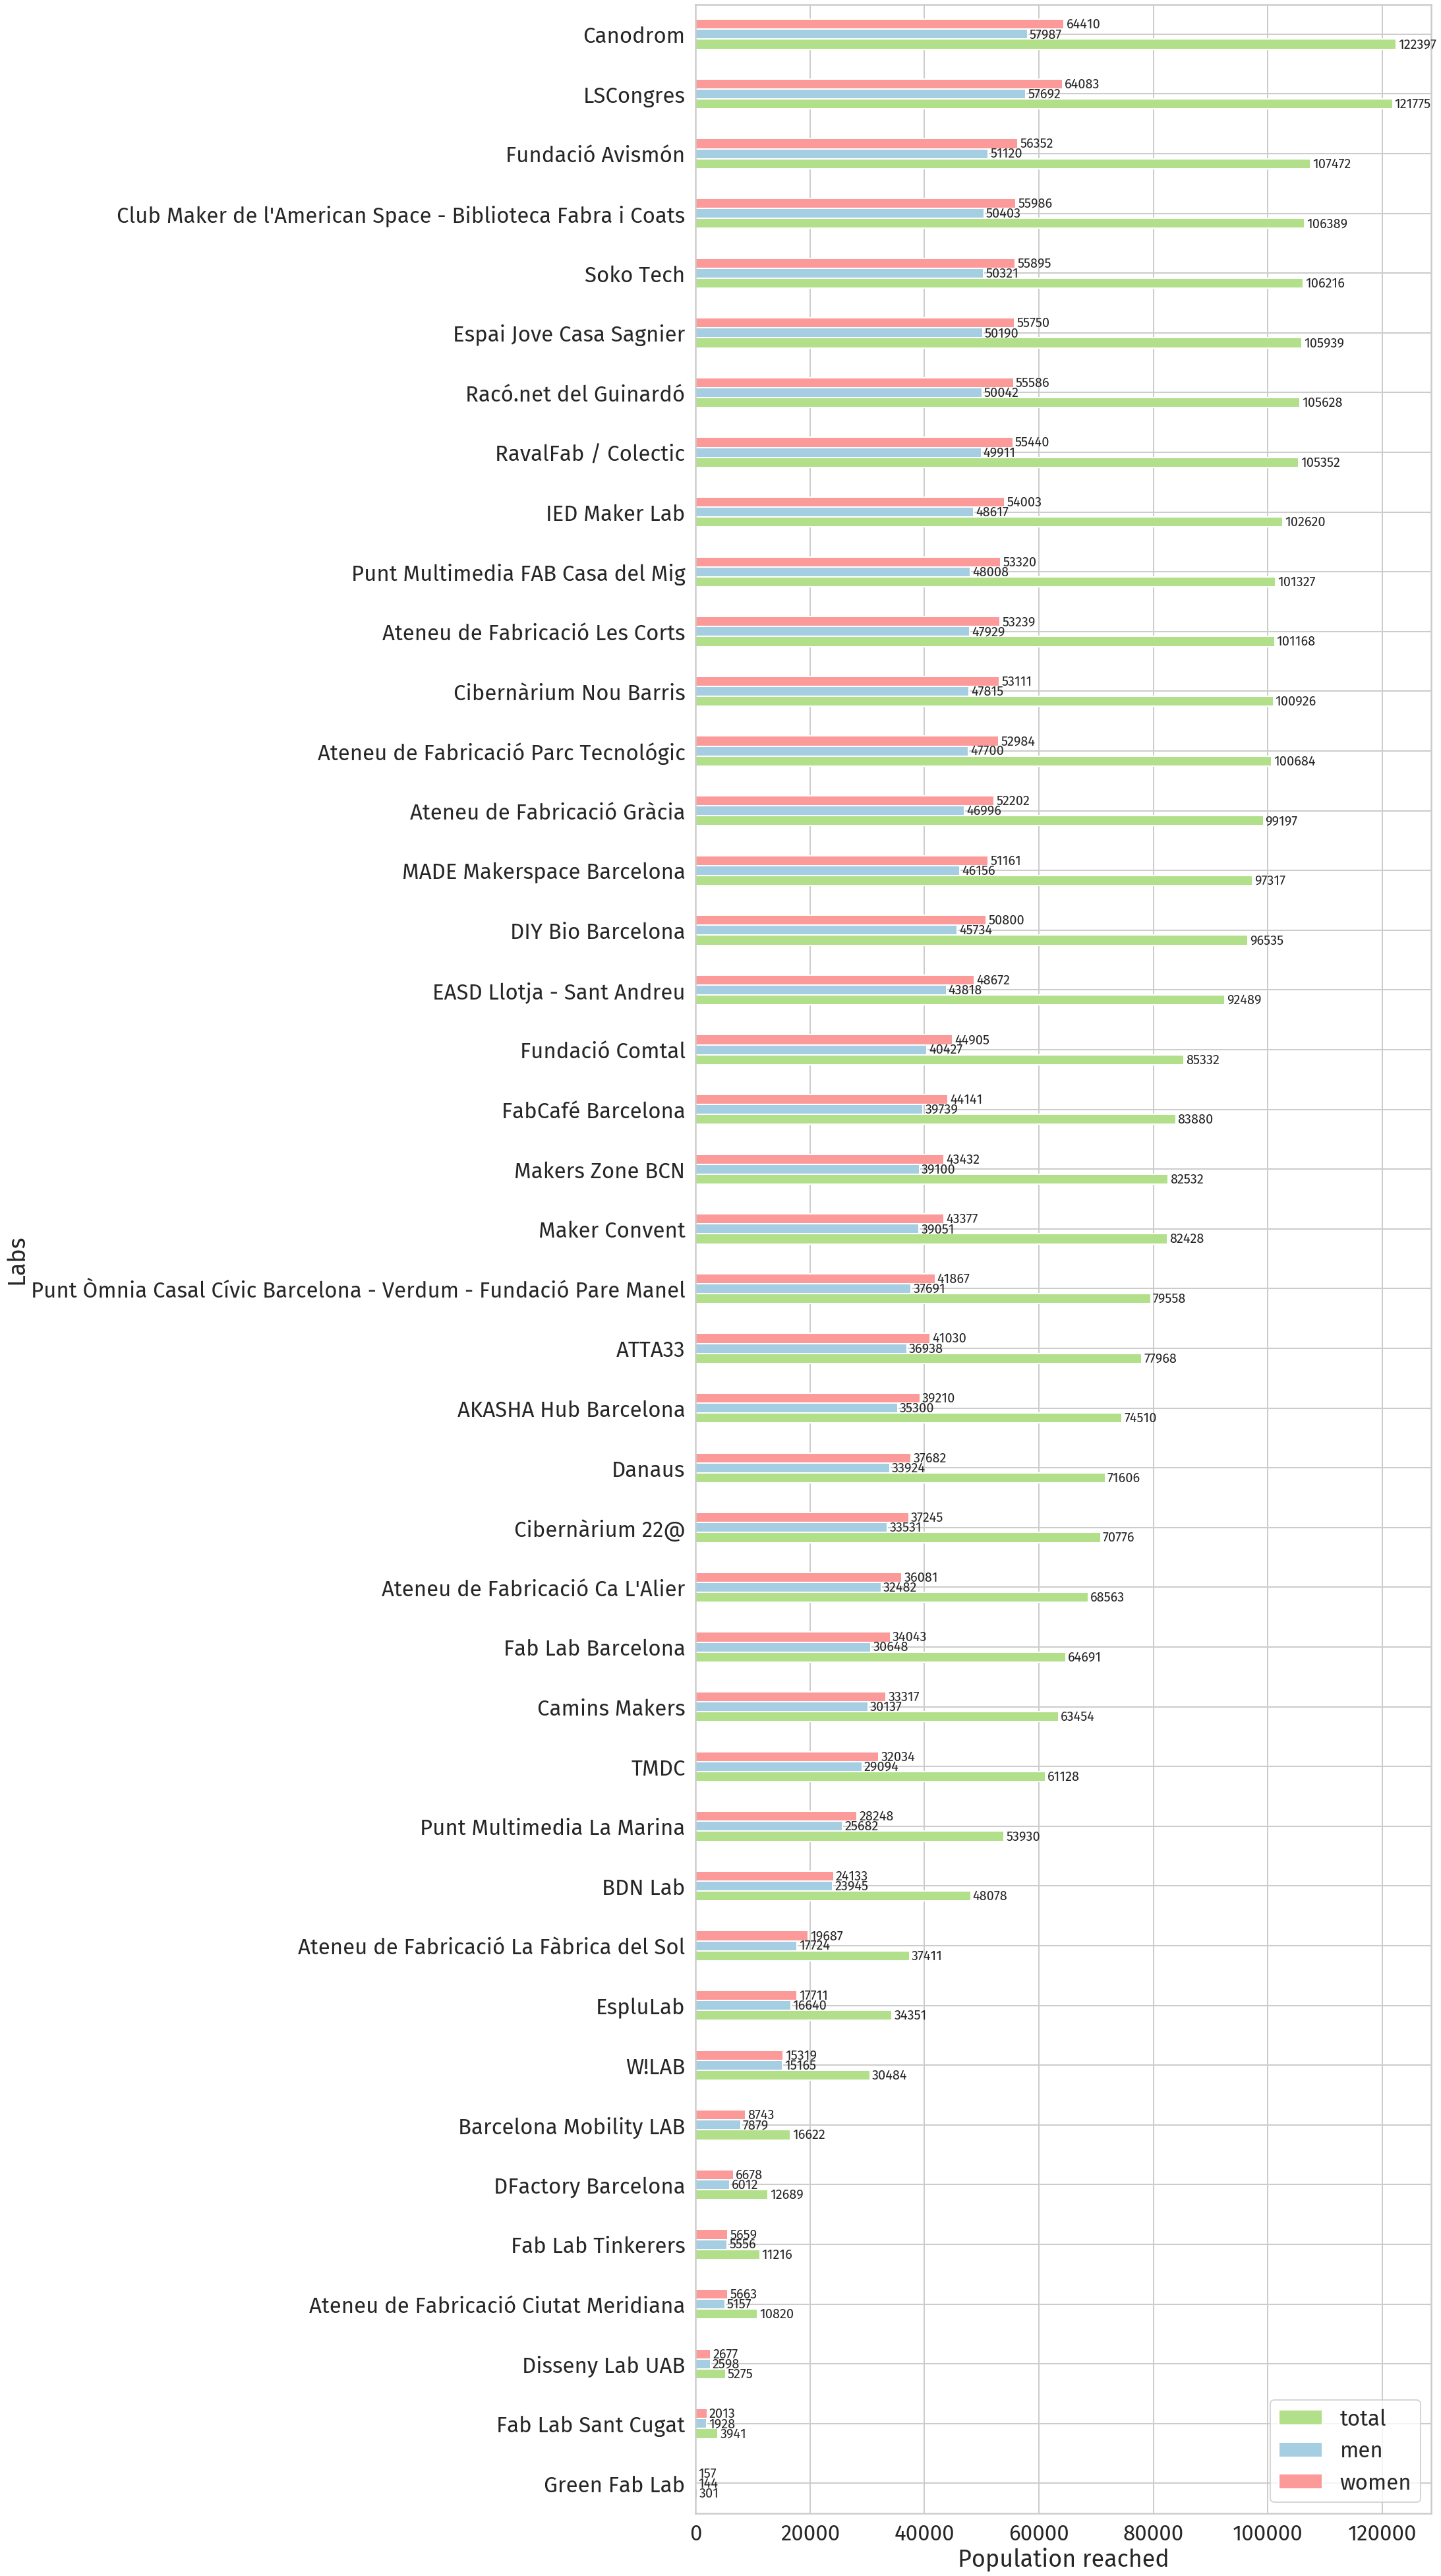

In [35]:
# Plot the data
colors = [sns.color_palette("Paired")[2],sns.color_palette("Paired")[0],sns.color_palette("Paired")[4]]
ax = labs_esp.set_index("name").sort_values(by=["total"])[["total", "men", "women"]].plot(kind="barh", color=colors, figsize=(20,70))
ax.bar_label(ax.containers[0], fmt="%d", size=20, padding=3)
ax.bar_label(ax.containers[1], fmt="%d", size=20, padding=3)
ax.bar_label(ax.containers[2], fmt="%d", size=20, padding=3)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_esp_fbpop_tot.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_esp_fbpop_tot.png", dpi=300, bbox_inches="tight")

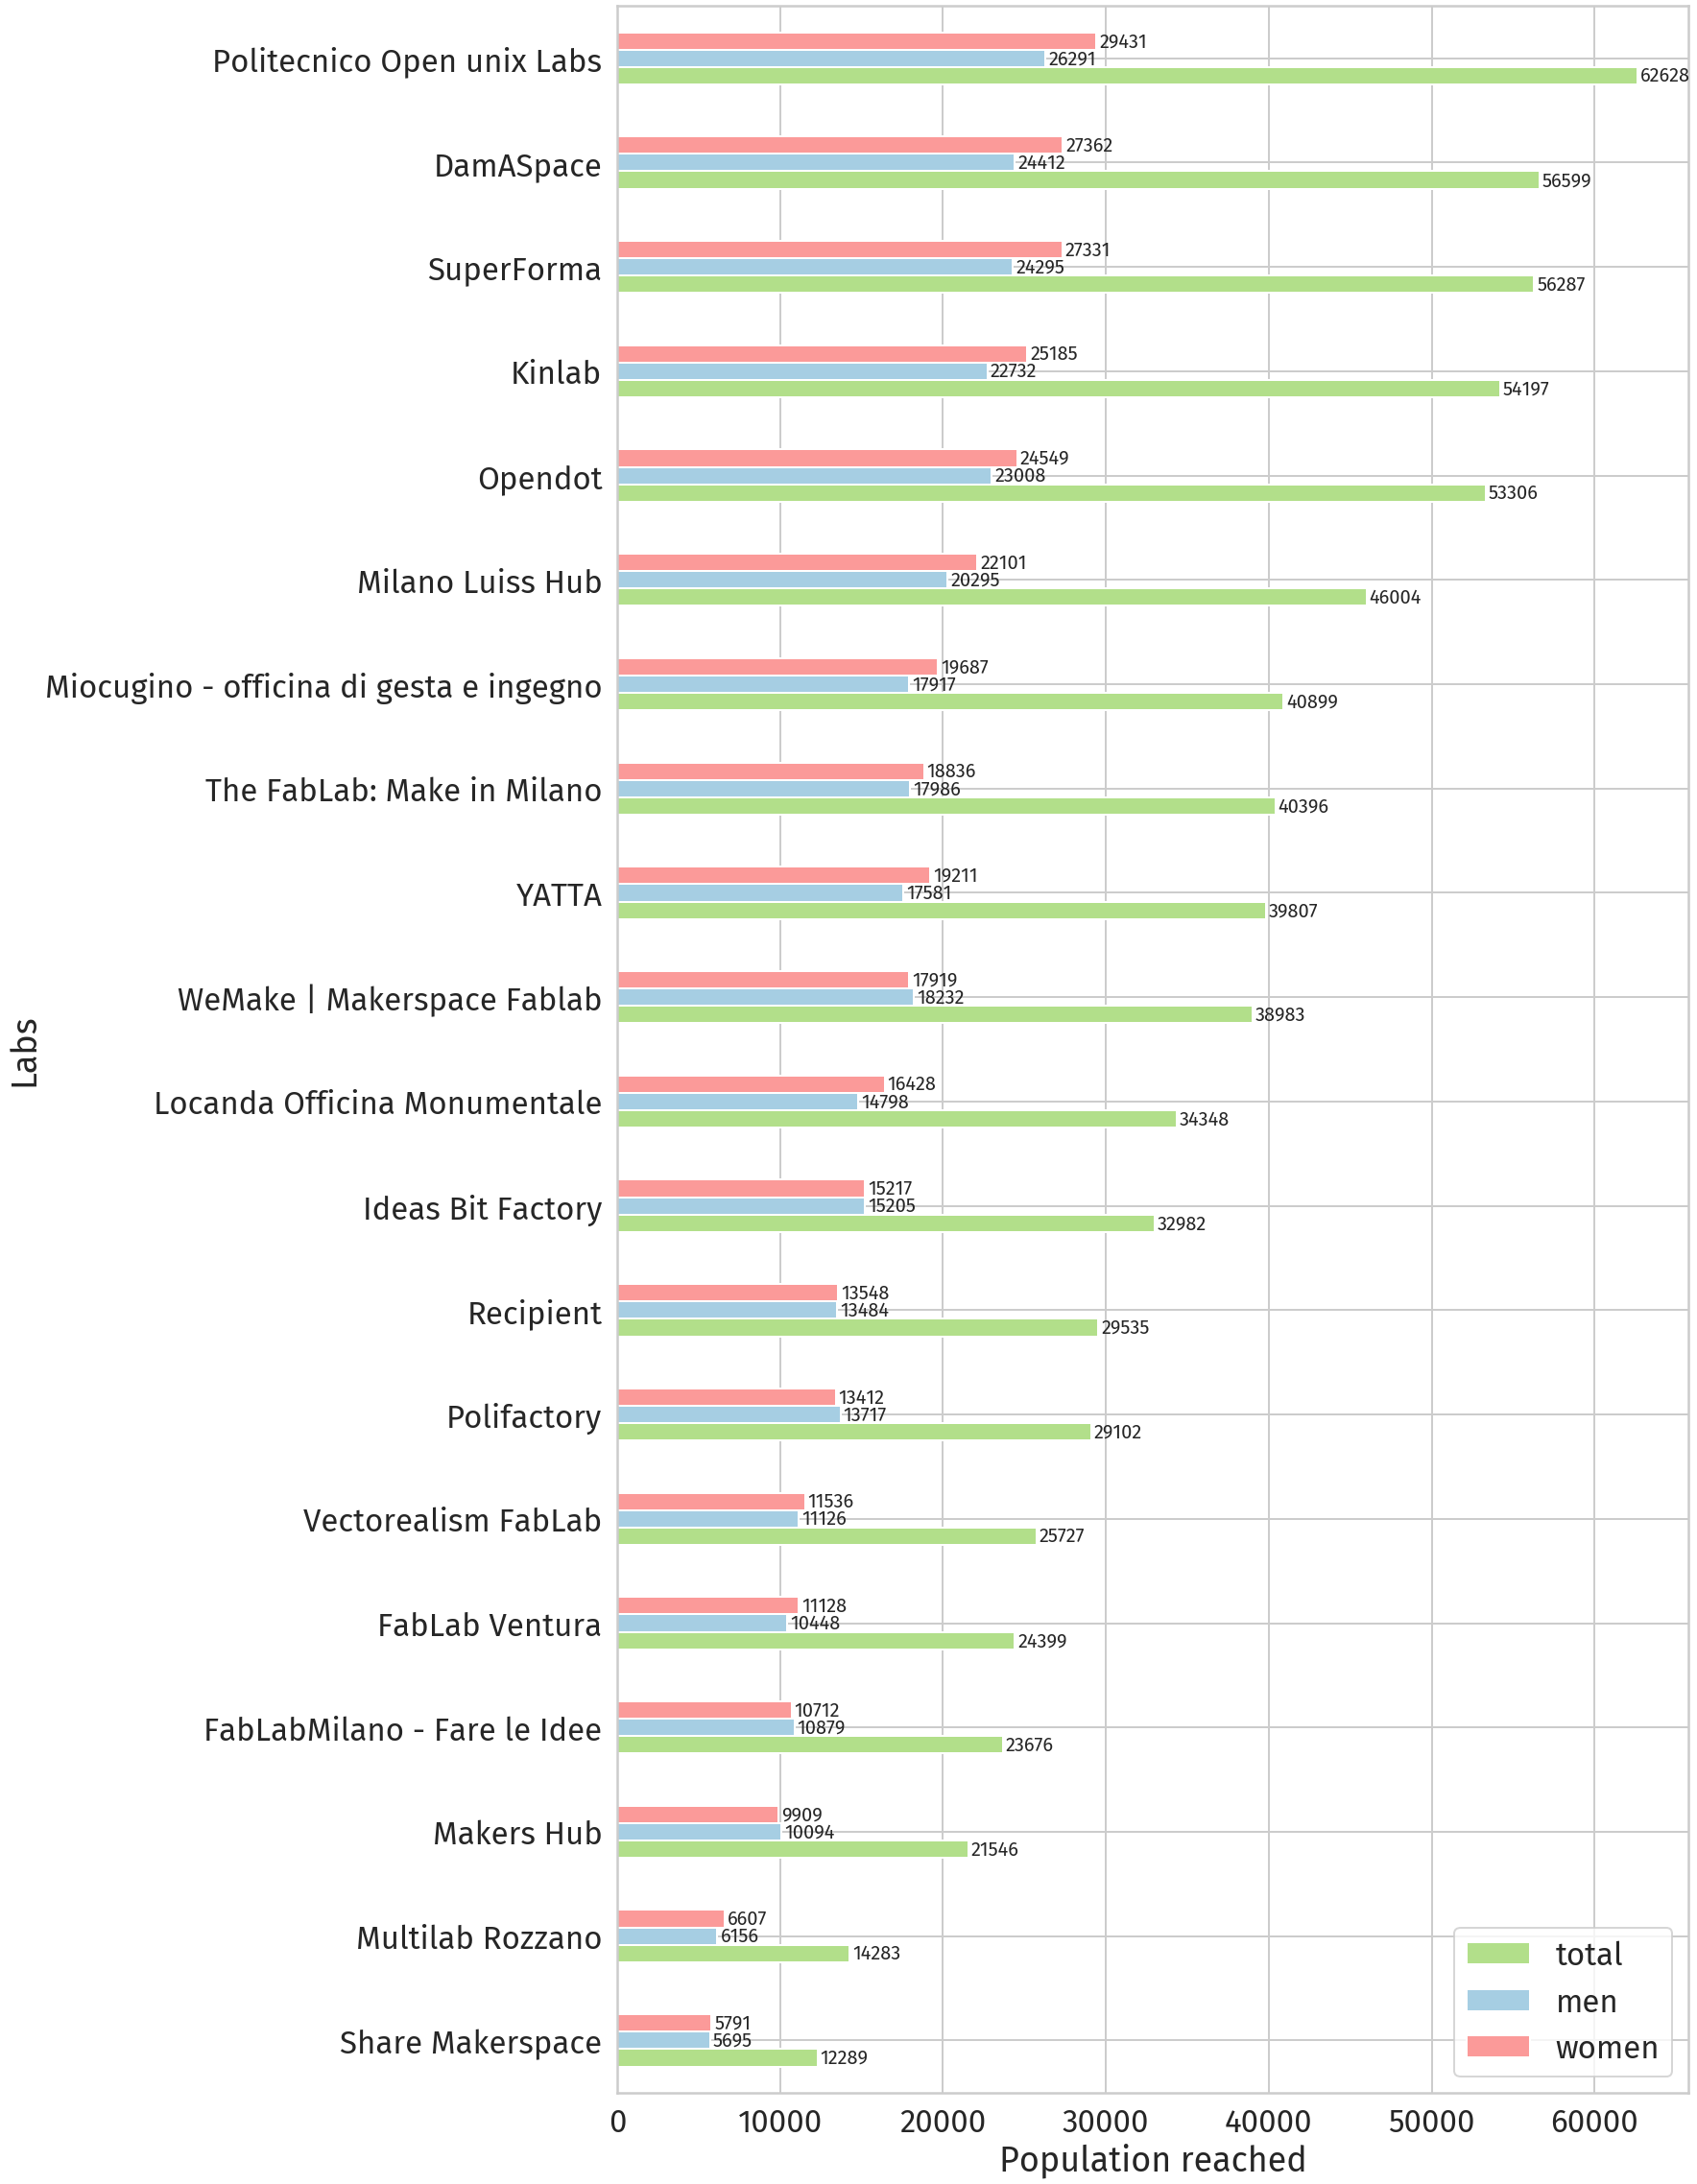

In [36]:
# Plot the data
colors = [sns.color_palette("Paired")[2],sns.color_palette("Paired")[0],sns.color_palette("Paired")[4]]
ax = labs_ita.set_index("name").sort_values(by=["total"])[["total", "men", "women"]].plot(kind="barh", color=colors, figsize=(20,40))
ax.bar_label(ax.containers[0], fmt="%d", size=20, padding=3)
ax.bar_label(ax.containers[1], fmt="%d", size=20, padding=3)
ax.bar_label(ax.containers[2], fmt="%d", size=20, padding=3)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_ita_fbpop_tot.svg", bbox_inches="tight")
plt.savefig("svg" + os.sep + "labs_ita_fbpop_tot.pdf", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_ita_fbpop_tot.png", dpi=300, bbox_inches="tight")

Export the data

In [38]:
labs_esp.to_csv("data" + os.sep + "labs_esp.csv")
labs_ita.to_csv("data" + os.sep + "labs_ita.csv")